# Data Pipeline - E-Commerce Shipping Data Analysis

This notebook builds the **data preprocessing pipeline** for the E-Commerce Shipping dataset.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
# Load the dataset
df = pd.read_csv("../data/processed/train_split.csv")
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,3,5,178,3,1,0,7,4135,0
1,0,2,6,3,202,4,2,0,3,4496,1
2,3,2,2,5,277,3,2,1,6,1032,0
3,2,2,5,5,219,2,2,1,4,4289,0
4,2,0,6,3,296,4,1,0,4,1650,0


## Define features
Separate features and target variable
We will drop the target `Reached.on.Time_Y.N` from the feature matrix X
and keep it in y for later modeling.
We also identify numerical and categorical features separately.

In [3]:
# Define features
X = df.drop("Reached.on.Time_Y.N", axis=1)
y = df["Reached.on.Time_Y.N"]

numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

numerical_features, categorical_features

(Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
        'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
       dtype='object'),
 Index([], dtype='object'))

## Create preprocessing pipelines
Create preprocessing pipelines
- Numerical pipeline: StandardScaler
- Categorical pipeline: OneHotEncoder
We will combine them using ColumnTransformer.

In [4]:
# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_features),
    ("cat", categorical_pipeline, categorical_features)
])

print("Data preprocessing pipeline created.")

Data preprocessing pipeline created.


## Evaluate numerical transformation effect

Evaluate distribution changes after scaling numerical features
We will compare histograms before and after StandardScaler transformation.

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


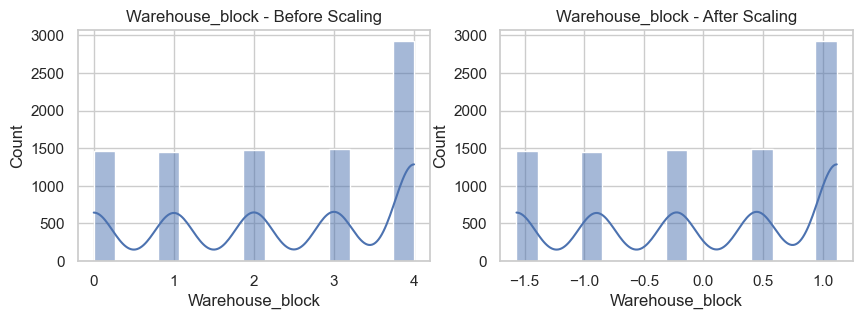

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


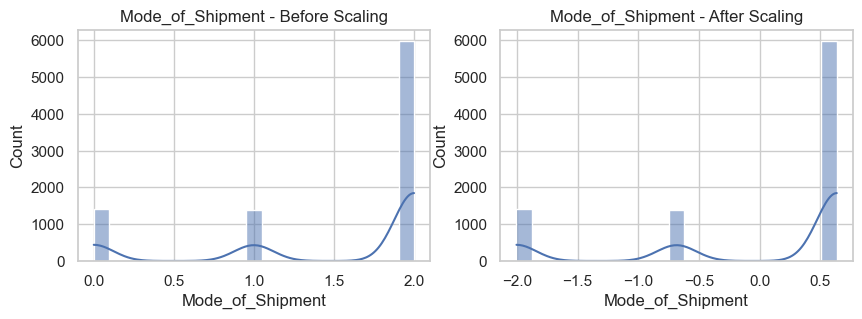

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


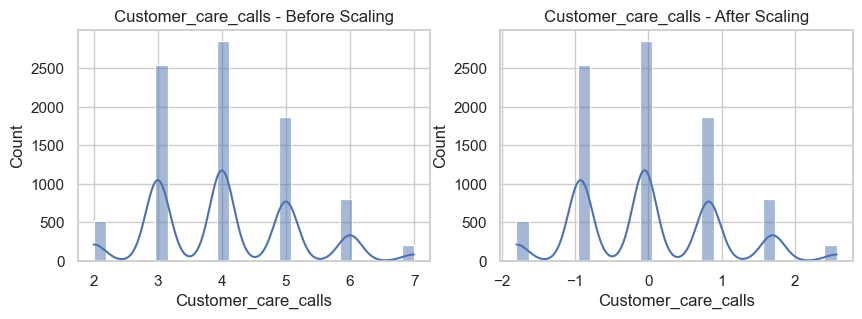

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


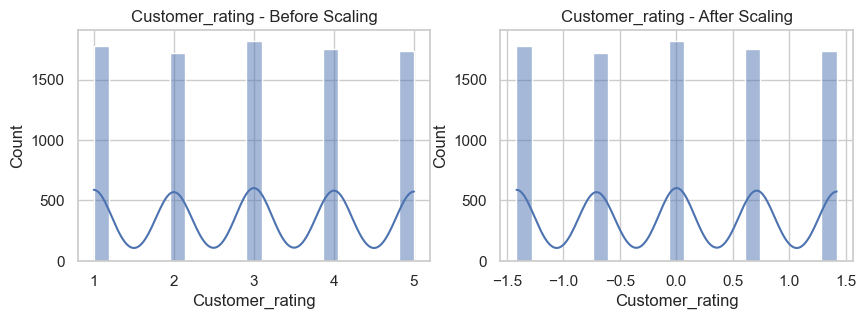

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


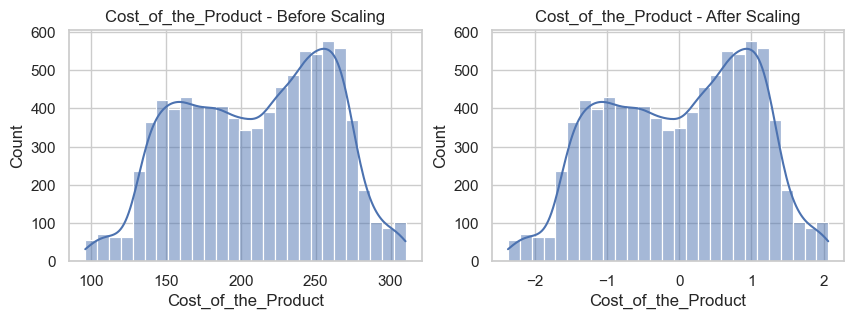

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


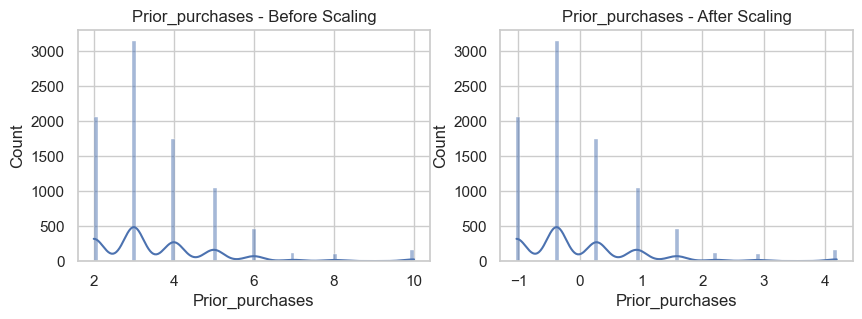

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


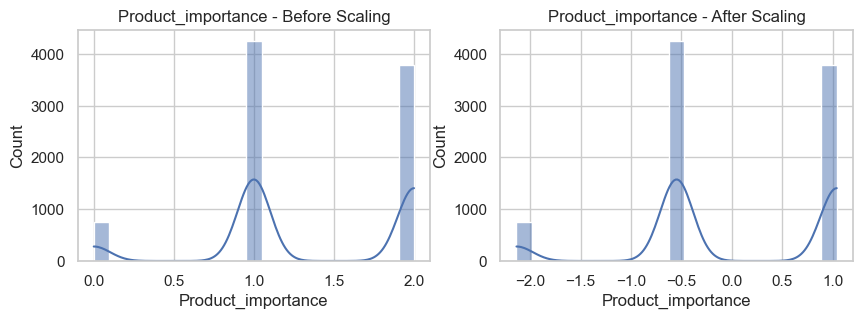

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


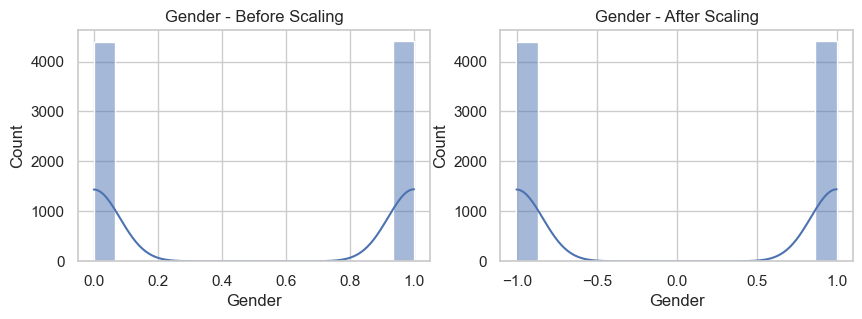

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


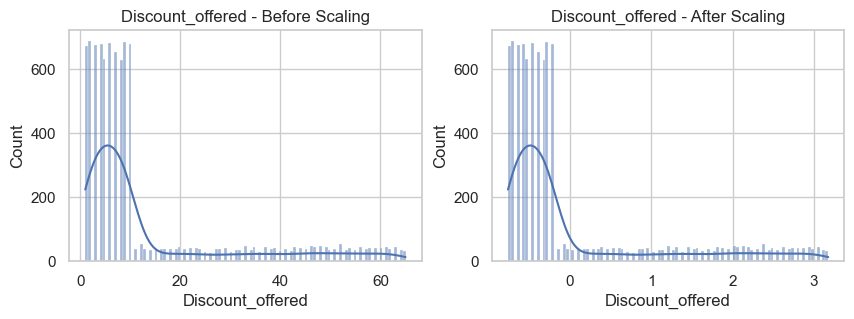

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


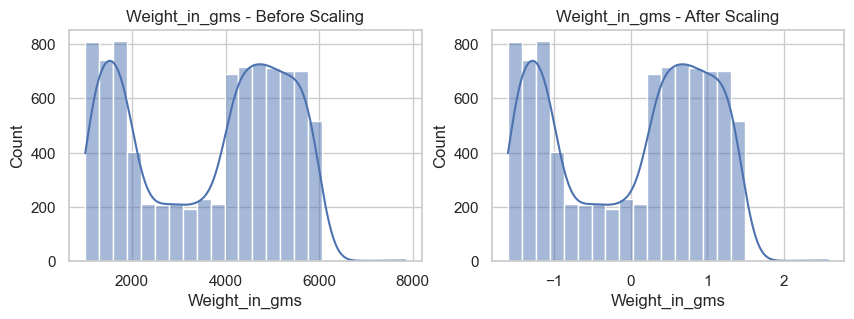

In [5]:
X_num_before = X[numerical_features]
X_num_after = numerical_pipeline.fit_transform(X_num_before)
X_num_after_df = pd.DataFrame(X_num_after, columns=numerical_features)

for col in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(X_num_before[col], ax=axes[0], kde=True)
    axes[0].set_title(f"{col} - Before Scaling")
    sns.histplot(X_num_after_df[col], ax=axes[1], kde=True)
    axes[1].set_title(f"{col} - After Scaling")
    plt.show()

## Check categorical encoding result

Count new columns from categorical encoding and calculate sparsity
- `num_new_columns`: number of new dummy columns generated by OneHotEncoder
- `sparsity`: proportion of empty cells in the encoded matrix

In [6]:
ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(X[categorical_features])

num_new_columns = len(ohe.get_feature_names_out())
print("Number of new columns from categorical encoding:", num_new_columns)

X_cat_transformed = ohe.transform(X[categorical_features])
sparsity = 1.0 - (X_cat_transformed.nnz / (X_cat_transformed.shape[0] * X_cat_transformed.shape[1]))
print(f"Sparsity after categorical encoding: {sparsity:.4f}")

Number of new columns from categorical encoding: 0


ZeroDivisionError: division by zero